In [1]:
import numpy as np
import pickle
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt



In [2]:

vgg_model = VGG16()
vgg_model = Model(inputs=vgg_model.inputs, outputs=vgg_model.layers[-2].output)

with open('Transfer/tokenizer.pkl', 'rb') as f:
    tokenizer = pickle.load(f)

with open('Transfer/features.pkl', 'rb') as f:
    features = pickle.load(f)

with open('Transfer/best_model.pkl', 'rb') as f:
    model = pickle.load(f)


In [3]:

def idx_to_word(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None


def predict_caption(model, image, tokenizer, max_length):
    in_text = 'startseq'
    for i in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], max_length, padding='post')
        yhat = model.predict([image, sequence], verbose=0)
        yhat = np.argmax(yhat)
        word = idx_to_word(yhat, tokenizer)
        if word is None:
            break
        in_text += " " + word
        if word == 'endseq':
            break
    return in_text


def process_image(image_path):
    image = load_img(image_path, target_size=(224, 224))
    image = img_to_array(image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    image = preprocess_input(image)
    return image



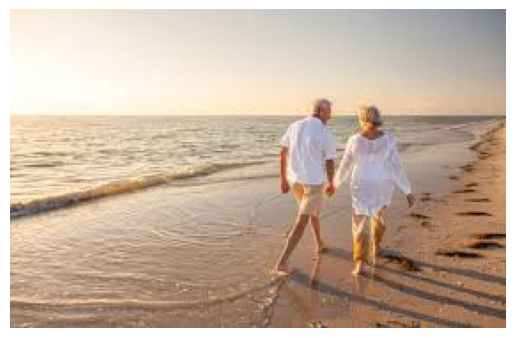

Predicted Caption: startseq two people are walking along the beach barefoot endseq


In [4]:

def main():
    image_path = input("Enter the image file path: ")


    image_to_display = load_img(image_path)
    plt.imshow(image_to_display)
    plt.axis('off')
    plt.show()

    
    processed_image = process_image(image_path)
    feature = vgg_model.predict(processed_image, verbose=0)

    
    max_length = 35
    caption = predict_caption(model, feature, tokenizer, max_length)
    print("Predicted Caption:", caption)


if __name__ == "__main__":
    main()

